# Neural Network #
## Python Tutorial ##

Neural networks are computational models inspired by the human brain's structure and function, capable of learning and making predictions from complex data.

This looks something like this

![SimpleNN](https://www.researchgate.net/publication/337469702/figure/fig1/AS:828416181932032@1574521217879/Simple-neural-network-diagram-http-cs231ngithubio-neuralnetworks-1-The-nodes-are.ppm)

Neural networks process input data through layers of neurons, where each neuron applies transformations to the data using activation functions and learns to make predictions by adjusting its parameters during training, aiming to minimize prediction errors.

<i>Note: There are as many hidden layers and neurons as you want and more does not necessarily imply better</i>
<hr/>

#### Importing Libraries ####

Here are pieces of other people's code that will help as understand what we're doing along the way

To install these click terminal on whichever IDE you're using and use pip to instal eg: <code>pip install matplotlib.pyplot</code>

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

## How to do It ##

This is the MNIST dataset which is a dataset for training simple neural networks on handwritten digits

We will train and run our model on subsets of them

In [25]:
handwritting_data_raw = pd.read_csv("data/Handwritting_dataset/train.csv")
handwritting_data_raw.head()


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Each row represents the a handwritten digit in a 28 by 28 pixel grid and the value brigtness of each pixel.

This is how a digit would look

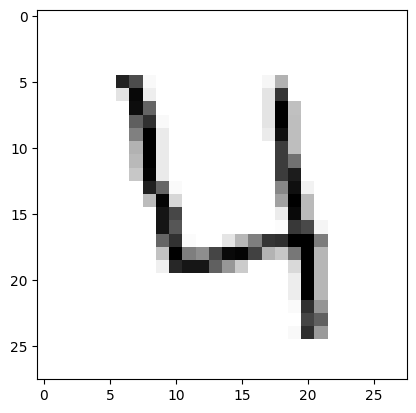

In [26]:
# convert the data to numpy arrays
handwritting_data = np.array(handwritting_data_raw)

exampleMatrix = handwritting_data[3][1:].reshape(28, 28)

plt.imshow(exampleMatrix, cmap=plt.cm.binary)

## Forward Propagation ##
This is the passing of data from the input layer to the output layer through the hidden layers. Each neuron after the input to output layer has 2 components called the weights and bias. <b>Weights</b> determine the strength of influence that one neuron has with the next neuron it transmits information to. <b>Biases</b> are the initial value that a weight can possess even if all parameters are 0.

The process of information transmission is done through matrix multiplication of the input and the weights and addition of biases of each neutron much resembling a linear function. The result of this is then applied through an activation function. 

The <b>activation function</b> is a function that changes the output from being linear which gives the neural network all its magic. This is like painting a picture but now from only using straight lines we can introduce curves and contrasts. The activation then refers to the final output value.

![Yo](https://miro.medium.com/v2/resize:fit:4800/format:webp/1*U3QZ_Yn4fcjbdUkIwHJ90w.gif)

### Math ###
<i>A basic understanding of matrices and matrix multiplication is needed<i>

So a neuron receives input and applies a linear transformation to it and apply an activation function to it.

$$ r = wx + b $$
$$ a = f(z) $$

Where

$$ w(weights) \in \mathbb{R}^{m\times1} ,\hspace{5mm} x(inputs) \in \mathbb{R}^{1\times m} ,\hspace{5mm} b(bias), \hspace{1.5mm} z(linear \hspace{1.5mm} result), \hspace{2mm} a(activation) \in  \mathbb{R}^1$$

and f is the activation function

You can scale this up to a whole layer of neurons so where for a neuron in layer i:

$$ w^{[i]} = \begin{bmatrix}w^{[i]}_1, w^{[i]}_2, & \cdots &, w^{[i]}_n \end{bmatrix}, \hspace{5mm} x = \begin{bmatrix}x^{[i]}_1, x^{[i]}_2, & \cdots &, x^{[i]}_n \end{bmatrix}^T \hspace{3mm} and \hspace{3mm} b^{[i]} = b^{[i]} $$

The operations in the layer can be represented with the equations:

$$ Z = WX + B$$
$$ A = f(R) $$

where
$$ W^{[i]} = \begin{bmatrix}w^{[i]}_{11} & w^{[i]}_{12} & \cdots & w^{[i]}_{1n}\\ w^{[i]}_{21} & \ddots& \cdots & \vdots \\ \vdots & \vdots& \ddots & \vdots\\ w^{[i]}_{m1} & \cdots & \cdots & w^{[i]}_{mn}\\ \end{bmatrix}, \hspace{5mm} X^{[i]} = \begin{bmatrix}x^{[i]}_{11} & x^{[i]}_{12} & \cdots & x^{[i]}_{1n}\\ x^{[i]}_{21} & \ddots& \cdots & \vdots \\ \vdots & \vdots& \ddots & \vdots\\ x^{[i]}_{m1} & \cdots & \cdots & x^{[i]}_{mn}\\ \end{bmatrix}^T \hspace{3mm} and \hspace{3mm} B^{[i]} = \begin{bmatrix}b^{[i]}_1 \\ b^{[i]}_2 \\ \vdots \\ b^{[i]}_m\end{bmatrix} $$ 

This works because matrices can be layered

So for our neural network we will have 784 neurons in the input layers for the 28 by 28 pixel grid and I chose 1 hidden layer with 16 neurons and lastly the output layer will have 10, corresponding to the 10 digits it could be.

<i>Note: The input layer does not have any weights and biases because it introduces primary data.</i>

We first want to normalise the pixel data as each value is given from 0 to 255 which is computationally complex whereas working from 0 to 1 is much better.

When initialising The values for weights and biases can just be randomised as the values are updated after training.

In [41]:
def LayerInit(numNeurons, numPreviousLayerNeurons):
    # creates a randomised matrix
    weights = np.random.rand(numNeurons, numPreviousLayerNeurons) - 0.5
    bias = np.random.rand(numNeurons, 1) - 0.5
    return {"weights": weights, "bias": bias}


L0 = handwritting_data[1:]/255
L1 = LayerInit(16, 784)
L2 = LayerInit(10, 16)


For our activation function we have some guidelines to choosing one that works.
<ul>
<li><b>Non-linear</b> function, as mentioned earlier to have complexity</li>
<li>It has to be <b>differentiable</b> this is to enable optimization which will be seen later when training</li>
<li>It should have <b>appropriate range</b>. For classifying multiple classes some functions produce probability functions and for binary classification functions with a smaller range work well</li>
<li><b>Computational complexity</b> should be low and effecient to evaluate especially as training large models takes significant resources</li>
</ul>

Common activation functions are:


![activationfunctions](https://lh4.googleusercontent.com/hTeaMXYrsBlpKrGvRCvSX8maYuU4Zhd9-6B_Z3QjnnpE02MhfFK8IHgrDsX9U9SoSw9MIJFQbQyR64PHqNjGfMa8LgUctX5ht0Z21NxqJ-AAd5bU30mFGaTzNhiNuiwO2OVvpfYYFAonf3k8wQTqwGA)

The functions we use are : [ReLU]('https://www.nomidl.com/wp-content/uploads/2022/04/image-10.png') which returns values between 0 and 1(We normalised the data) for the hidden layer and [Softmax]('https://siegel.work/blog/ActivationFunctions/img/softmax.png') which returns exaggarated probability values for the output layer

$$ ReLU(Z) = max (0,Z) $$
$$softmax(Z) = \frac{e^{z_i}}{\sum_{j=1}^{N} e^{z_j}} $$

In [42]:
def ReLU(Z):
    return np.maximum(Z,0)

def softmax(Z):
    O = np.exp(Z) / sum(np.exp(Z))
    return O

Lastly lets put all these steps together to create a function called foward propagation

In [43]:
def forwardPropagation(input,hiddenlayer,output):
    Z1 = hiddenlayer['weights'].dot(input) + hiddenlayer['bias']
    A1 = ReLU(Z1)
    Z2 = output['weights'].dot(A1) + output['bias']
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2


#### Flow ####

$$ \rightarrow Z^{[1]} = W^{[1]}X^{[0]} + B^{[1]} $$ 
$$ \rightarrow A^{[1]} = f_{ReLU}(Z^{[1]}) $$
$$ \rightarrow Z^{[2]} = W^{[2]}A^{[1]} + B^{[2]} $$
$$ \rightarrow A^{[2]} = g_{softmax}(Z^{[2]}) $$

## Backward Propagation ##
So how does the neural network learn?

Great question! This is called backpropagation which is the key algorithm for training our model. As you can see we randomised our weights and biases when initialising, this is because adjusting each weight and bias manually would take ages.

We train our model by letting our model guess and then telling it how far it was from the correct answer to update its parameters. Your goal is to minimize the distance to the correct answer. Think of training a neural network like navigating through a maze to reach a treasure. The cost function is like a guide telling you how far you are from the treasure after each step you take. Your goal is to minimize this distance to get as close to the treasure as possible.

We call the distance to treasure the <b>Loss function</b>. We then want to change the weights and biases in each layer to minimize this. 

### Math ###
<i>The tricky bit. It's long and gruesome and you can colapse it if you'd like, but it is the derivation of possibly the coolest code we have ever made</i>

A decent understanding of calculus is needed but the steps we take are:
<ul>
<li>Chose a loss function</li>
<li>Minimize it with respect to weights and biases</li>
<li>Gradient descent. These are the steps that vary the weights and biases to most effeciently decrease the loss function</li>
</ul>

#### Derivations ####

We first need to chose a loss function. To keep it simple we will use the Mean Squared Error as our loss.
$$ L = \frac{1}{m} \sum_{i=1}^{m} (\hat{y}_i - y_i)^2 $$
$$ L = \text{loss} \hspace{5mm} m = \text{number of output neurons} \hspace{5mm} y_i = \text{correct probability} \hspace{5mm} \hat{y_i} = \text{predicted probability} $$

Now we want want thisloss to decrease most for the smallest change in the weights and biases. As usual with minimization problems we need calculus. 

Differenciate the loss with respect to the predictions  

$$ \frac{dL}{d\hat{y}}= \frac{2}{m}\sum_{i=1}^{m} (\hat{y}_i - y_i)$$

We can represent this with our matrix notation from before
$$ \frac{dL}{dA^{[2]}} = \frac{2}{m}(A^{[2]} - Y) $$

As
$$ \hat{y} = A^{[2]} \hspace{5mm} and \hspace{5mm} y = Y $$

We then want to then find the the minimum with respect to the weight and biases. 

To get the minimum of the loss with respect to the weights we need to calculate the partial deriavtive. Which we can use the chain rule for
$$ \frac{\partial L}{\partial W^{[2]}} = \frac{\partial L}{\partial A^{[2]}} \times \frac{\partial A^{[2]}}{\partial W^{[2]}} $$

Since 
$$ A^{[2]} = f(W^{[2]}A^{[1]} + B^{[2]})$$

This gives us:

$$ \frac{\partial L}{\partial W^{[2]}} = \frac{2(A^{[2]} - Y)}{m}\times A^{[1]}f'(W^{[2]}A^{[1]} + B^{[2]})




### Final equations ###

Derivatives
$$ dZ^{[2]} = A^{[2]} - Y $$
$$ dW^{[2]} = \frac{1}{m}Z^{[2]}A^{[2]\hspace{1mm}T} $$
$$ dB^{[2]} = \frac{1}{m} \sum{dZ^{[2]}}$$
$$ dZ^{[1]} = W^{[2]T} dZ^{[2]} \times g^{[1]\prime} (z^{[1]})$$
$$ dW^{[1]} = \frac{1}{m} dZ^{[1]} A^{[0]T}$$
$$ dB^{[1]} = \frac{1}{m} \sum{dZ^{[1]}}$$

Changes
$$ W^{[2]} := W^{[2]} - \alpha dW^{[2]}$$
$$ b^{[2]} := b^{[2]} - \alpha db^{[2]}$$
$$ W^{[1]} := W^{[1]} - \alpha dW^{[1]}$$
$$ b^{[1]} := b^{[1]} - \alpha db^{[1]}$$